# Cálculo

## 1 - Elementos básicos

- Compreender os conceitos básicos do cálculo diferencial integral.
- Definir e plotar funções utilizando o Júpiter Notebook.
- Entender o conceito de limite e sua aplicação em funções.

In [3]:
# Bibliotecas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import warnings

### Funções

- Função: um objetos matemático que recebe um elemento (em geral numérico) e retorna um outro elemento (em geral numérico também)
- Domínio: é o conjunto de elementos ao qual a função será aplicada
- Contradomínio: conjunto dos elementos retornados pela função
- Imagem: o conjunto imagem da função é um subconjunto do contradomínio formado por todos os elementos correspondentes de algum elemento do domínio.

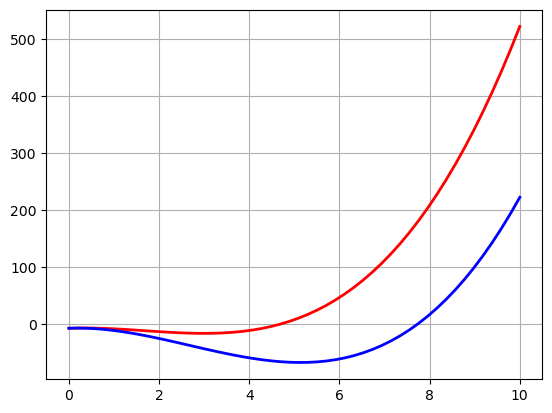

In [5]:
# Plotar uma função 

x = np.linspace(0, 10, 50)

func = lambda x: x**3 - 5*x**2 + 3*x - 8
func2 = lambda x: x**3 - 8*x**2 + 3*x - 8
y = func(x)
y2 = func2(x)

plt.plot(x, y, color='red', ls='-', lw=2)
plt.plot(x, y2, color='blue', ls='-', lw=2)
plt.grid()
plt.show()

### Limite

O conceito de limite expressa o valor retornado por uma função conforme ela se aproxima de uma certo valor especificado no seu domínio. Por exemplot, na função
$$
f(x) = 1/x
$$
- Quando maior o valor de $x$, mais $f(x)$ se aproxima de zero.

Podemos dizer que $lim_{x\rightarrow \infty} f(x) = 0$

Ou ainda:
- Tomando um valor real $\delta>0$, se calcularmos $f(0+\delta)$, quanto menor for $\delta$, maior será o valor de $f(x)$
- $f(0)$ não está definida.

Pode-se dizer então que $lim_{\delta \rightarrow 0}f(x-\delta) = \infty$

C:\Users\duduj\AppData\Local\Temp\ipykernel_19432\1495026665.py:5: RuntimeWarning: divide by zero encountered in divide
  func = lambda x: 1/x


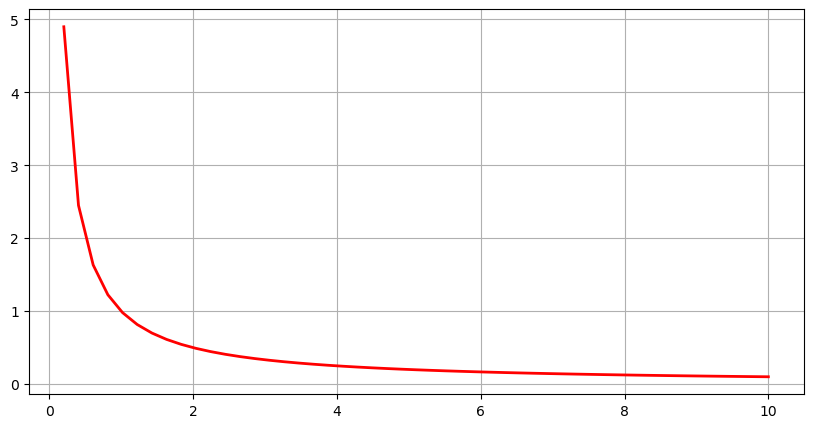

In [7]:
# Plotar uma função 

x = np.linspace(0, 10, 50)

func = lambda x: 1/x
y = func(x)

plt.figure(figsize=[10,5])
plt.plot(x, y, color='red', ls='-', lw=2)
plt.grid()
plt.show()

In [8]:
func(100000)

1e-05

In [9]:
func(0.0000001)

10000000.0

## 2 - Derivada

- Compreender o conceito de derivada
- Calcular a derivada de uma função
- Visualizar a função e sua derivada através de gráficos


O conceito de *derivada* de uma função é de extrema importância em matemática e em ciência de dados, pois é por meio dele que encontramos os parâmetros de uma regressão linear através do método dos minímos quadrados, além de inúmeras outras aplicações.

A derivada de uma função avaliada em um ponto $x$ é a inclinação da reta tangente dessa função avaliada nesse mesmo ponto. Intuitivamente, é a reta tangente da função no ponto $(x, f(x))$.

|![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Secante_calculo.svg/280px-Secante_calculo.svg.png) | ![image-2.png](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Derivada.svg/255px-Derivada.svg.png) |
|:-|:-|

[fonte da imagem](https://pt.wikipedia.org/wiki/Derivada)

##### Alterando valores com 'h' indo para zero

Vamos construir um gráfico da função $sen(x)$, e observar a reta que liga os pontos $(x, sen(x))$ e $(x+h, sen(x)+h)$, com $h$ se aproximando de zero.

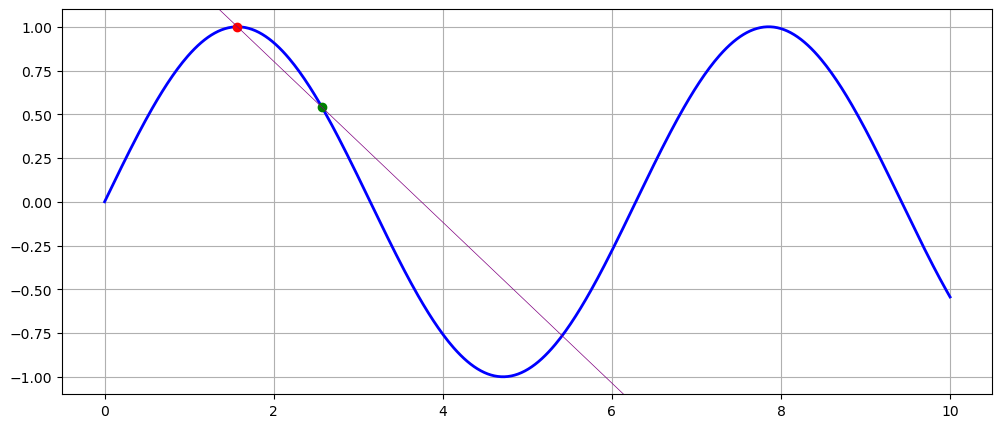

In [13]:
# Definindo uma figura
fig = plt.figure(figsize=[12,5])
ax = plt.subplot(111)
ax.grid()

# Definindo a função 
f = lambda x: np.sin(x)

# Definindo uma sequência uniforme em x 
x = np.linspace(0, 10, 500)

# Gerando o plot
ax.plot(x, f(x), color='blue', lw=2)

# Plotando um ponto x
x1 = np.pi/2
p1 = (x1, f(x1))
ax.plot(p1[0], p1[1], color='red', marker='o')

# Plotando x+h
h = 1
x2 = x1 + h
p2 = (x2, f(x2))
ax.plot(p2[0], p2[1], 'go')

# Plotando secante
ax.axline(xy1=p1, xy2=p2, color='purple', lw=.5)

plt.show()

##### Animação com 'h' indo para zero



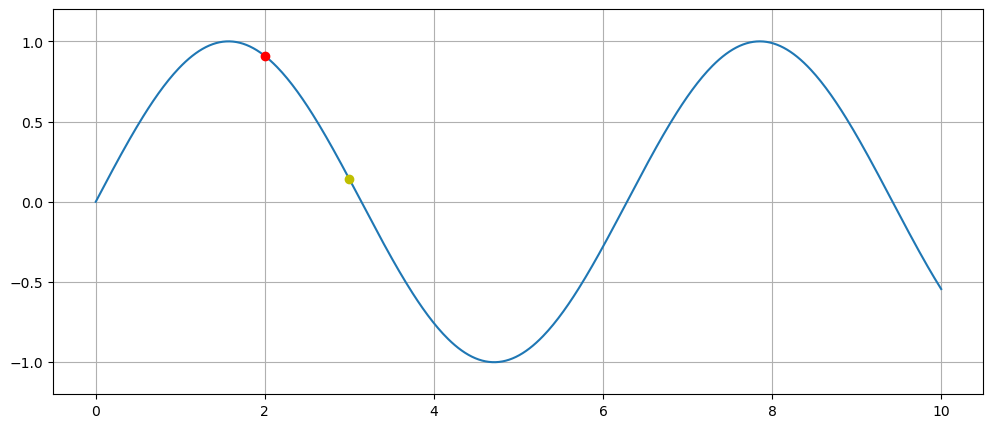

In [15]:
# Definir a figura e um sistema de eixos
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1, ylim = (-1.2, 1.2))   
ax.grid()

# Definir a função
f = lambda x: np.sin(x)
# Definir uma sequencia uniforme em x para o nosso gráfico
x = np.linspace(0,10, 500)
# Calcular f(x) para cada x da sequencia acima
y = f(x)

# Construir o gráfico
ax.plot(x, y, '-');

# Definir dois pontos vazios. Esses pontos vão receber
#      (x, f(x))
#      e (x+h, f(x+h))
h = 1
x1 =  4.5
x2 = x1 + h
p1 = (x1, f(x1))

x2 = x1 + h
p2 = (x2, f(x2))

pto1, = ax.plot(p1, 'ro')
pto2, = ax.plot(p2, 'yo')
linha_tang = ax.axline(xy1=[x1, f(x1)], xy2=[x2, f(x2)], color="red", linewidth=.5)

def linha_ab(delta=1, x1=2 ,pt1=pto1, pt2=pto2):
    x2 = x1 + delta
    y1 = f(x1)
    y2 = f(x2)
    
    pt1.set_data([x1], [y1])
    pt2.set_data([x2], [y2])
    
    inclinação = (y2-y1)/(x2-x1)
    
    linha_tang.set_data([x1, x2], [f(x1),  f(x2)])
    
    return (pt1, pt2)

elementos = linha_ab(delta=1)
xy1 = elementos[0]
xy2 = elementos[1]
# linha = ax.axline(xy1=xy1, xy2=xy2, color="red", linewidth=.5)

In [16]:
%%time
## Animação

# n_frames = 100
# def desenha_frames(n, num = n_frames, hmax=1):
#     return (linha_ab(delta=hmax - n*hmax/(n_frames+.1)))

# anim = FuncAnimation(fig, desenha_frames, frames=n_frames, interval=20, blit=True)
# HTML(anim.to_jshtml())

CPU times: total: 0 ns
Wall time: 0 ns


##### Plotando $f(x)$ e $F'(x)$ com $f=sin$

Função $sin(x)$ e sua derivada $cos(x)$, realçando o valor da função, a reta tangente e o valor da derivada

CPU times: total: 31.2 ms
Wall time: 32.3 ms


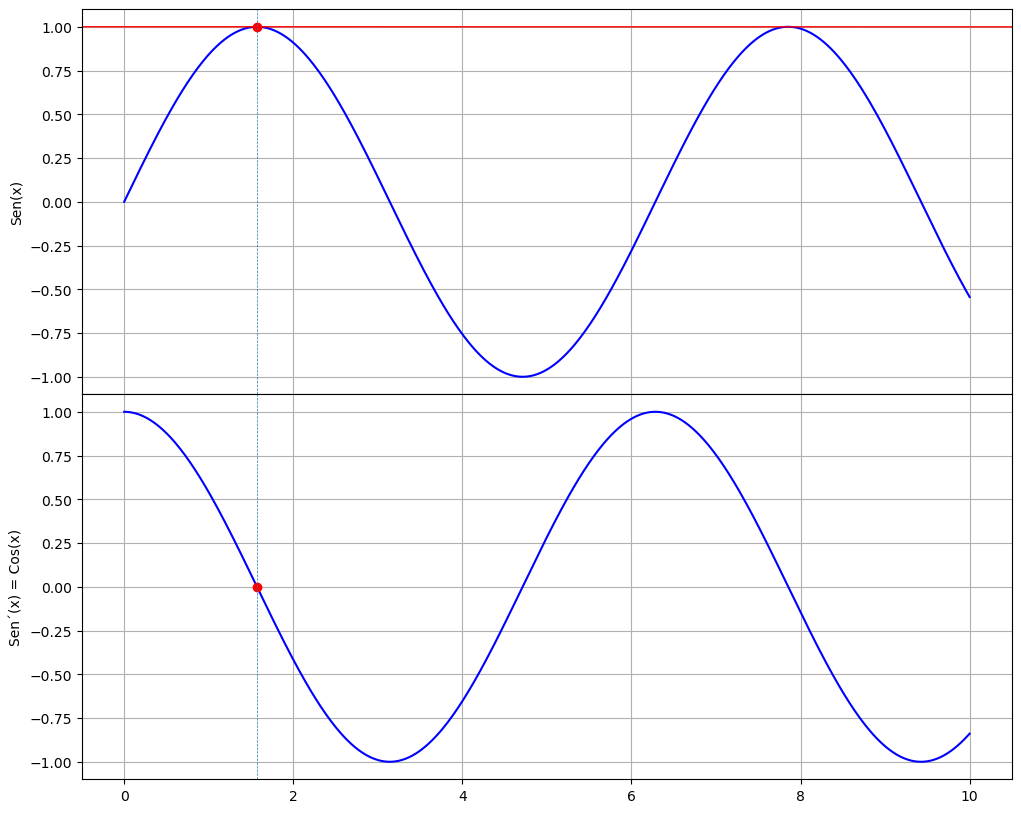

In [18]:
%%time
# Definir a figura e um sistema de eixos

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))
plt.subplots_adjust(hspace=0)

ax1 = plt.subplot(2,1,1)   
ax2 = plt.subplot(2,1,2) 
ax1.grid()
ax2.grid()

# Definir a função
f = lambda x: np.sin(x)
flinha = lambda x: np.cos(x)

# Definir uma sequencia uniforme em x para o nosso gráfico
x = np.linspace(0,10, 500)
# Calcular f(x) para cada x da sequencia acima
y = f(x)

# Construir o gráfico
ax1.plot(x, y, color='blue');
ax2.plot(x, flinha(x), color='blue')

# Rótulos dos eixos verticais
ax1.set_ylabel('Sen(x)')
ax2.set_ylabel('Sen´(x) = Cos(x)')

# Plotar (x, f(x)) e (x, f'(x)) nos grávicos
#      (x, f(x))
#      e (x+h, f(x+h))
h=.0001
x1 =  0
x2 = x1 + h

p1, = ax1.plot([x1], [f(x1)], 'ro')
# linha = ax1.axline(xy1=[x1, f(x1)], xy2=[x2, f(x2)], color="red", linewidth=.5)


plinha, = ax2.plot([x1], [flinha(x1)], 'ro')

# Plota linhas verticais de referência em X nos dois gráficos
linhav1 = ax1.axvline(x1, linewidth=.5, linestyle='--')
linhav2 = ax2.axvline(x1, linewidth=.5, linestyle='--')

# Essa função altera os dados dos elementos do gráfico para a animação
def linha_ab(delta=.0001, x1=4.5 ,p1_=p1, p2_=p2, plin=plinha):
#     Dado o ponto x, define a derivada para um delta bem pequeno
    x2 = x1 + delta
    
    # Altera as linhas verticais de acordo com x
    linhav1.set_data([x1, x1], [0,1])
    linhav2.set_data([x1, x1], [0,1])
    
    # Altera os pontos de referencia de acordo com x
    p1_.set_data([x1], [f(x1)])
    plin.set_data([x1], [flinha(x1)])
    
    # Calcula a inclinação
    inclinação = (f(x2)-f(x1))/(x2-x1)
    
    # Altera a posição da reta tangente de acordo com x
    # linha.set_data([x1, x2], [f(x1),  f(x2)])
    ax1.axline(xy1=[x1, f(x1)], xy2=[x2, f(x2)], color="red", linewidth=1)
    
    return linhav1, linhav2

l = linha_ab(x1=np.pi/2)

In [19]:
%%time
## Animação

# total_frames = 200
# def desenha_frame(n, tot_frames = total_frames):
#     x1_=10*n/total_frames
#     return linha_ab(delta=.001, x1=x1_ ,p1_=p1, p2_=p2)

# # desenha_frame(0)
# anim = FuncAnimation(fig, desenha_frame, frames=total_frames, interval=20, blit=True)
# HTML(anim.to_jshtml())

CPU times: total: 0 ns
Wall time: 0 ns


## 3 - Aplicações

- Compreender a definição formal de derivada e sua aplicação
- Aprender a calcular a derivada de uma função simples
- Identificar os valores que minimizam o erro quadrático médio.

**Definição**

Podemos definir a derivada de $f(x)$ como:

$$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} $$

**Algumas técnicas de derivação**

Nesta aula vamos trabalhar com os principais conceitos intuitivos do cálculo, e suas principais aplicações em ciência de dados, mas os principais resultados podem ser consultados obviamente em um bom livro de cálculo, como na [wikipedia](https://en.wikipedia.org/wiki/Differentiation_rules) ou até em cheat sheets que podem ser encontrados online.

- Regra da cadeia:  
$(f(g(x)))' = f'(g(x))g'(x)$


- Derivada de uma soma de funções:  
Se  
$f(x) = f_1(x) + f_2(x)$  
Então
$f'(x) = f_1'(x) + f_2'(x) $


- Quando a função não depende de $x$, a sua derivada (em relação a $x$) é zero:  
$f(x) = 3 \Rightarrow f'(x) = 0$  
ex:  
$f(x) = y^2 \Rightarrow f'(x) = 0$  


- Derivada de uma combinação linear:  
$ \left(a + bf(x)\right)' = b.f'(x) $


- Derivada de $\frac{1}{x}$ - segue a regra da potência de $x$:  
$(\frac{1}{x})' = x^a$ com a=-1:  
$(x^{-1})' = -1.x^{-2}$  


- Polinômio de primeiro grau:  
$f(x) = ax + b \Rightarrow f'(x) = (ax)' + (b)' = a $  
ex:  
$f(x) = 3x + 10 \Rightarrow f'(x) = 3$  


- Polinômio de segundo grau:  
$f(x) = ax^2 + bx + c \Rightarrow 2ax + b $  
ex:  
$f(x) = 3x + 10 \Rightarrow f'(x) = 3$  


- Derivada de potência de x:  
$f(x) = ax^b \Rightarrow ab.x^{b-1}$


- Derivadas trigonométricas básicas:  
$sin(x)' = cos(x)$  
$cos(x)' = -sen(x)$


- Função exponencial:  
$(e^x)' = e^x$


- Logaritmo natural:  
$ln(x)' = \frac{1}{x}$

##### Derivadas parciais


**Aplicação**

Uma ferramenta como estas possui inúmeras aplicações, para citar uma classe ampla delas, se queremos achar um ponto de máximo ou de mínimo em uma função, esse ponto terá uma derivada igual a zero. Daí, podemos escrever um modelo de regressão por exemplo, escrever a equação dos erros de previsão desse modelo em função dos parâmetros, e tentar encontrar para qual conjunto de parâmetros essa função tem derivada igual a zero - isso nos dá o chamado estimador de mínimos quadrados.

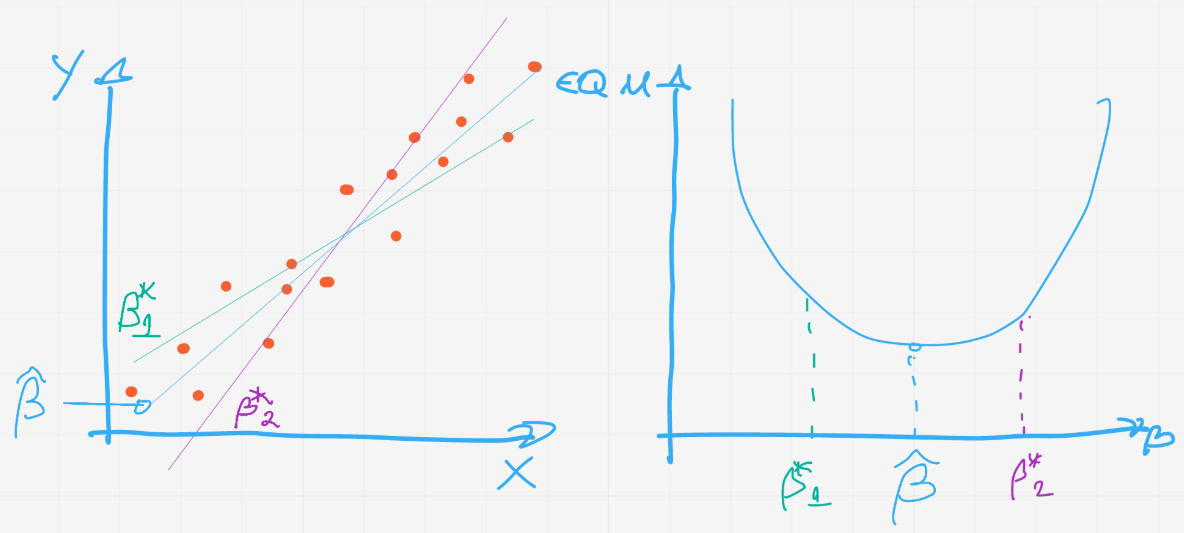

Nem toda função é derivável. Algumas funções vão admitir mais de uma reta que passa por (x, f(x)) com inclinações diferentes.

Uma demonstração disso está disponível na [wikipedia](https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados)


Vamos tomar como exemplo uma regressão na base de gorjetas, explicando a variável ```tip``` com a variável explicativa ```net_bill```. Considere a função da soma de quadrados do erro dessa regressão como uma função de $\alpha$ e $\beta$.


##### Exemplo visual
Vamos tomar como exemplo uma regressão na base de gorjetas, explicando a variável ```tip``` com a variável explicativa ```net_bill```. Considere a função da soma de quadrados do erro dessa regressão como uma função de $\alpha$ e $\beta$.

Vamos então importar a base de gorjetas e dar uma olhadela na regressão mencionada feita pelo statsmodels.

In [24]:
import seaborn as sns
import statsmodels.formula.api as smf

In [25]:
# Carregando dataset

df = sns.load_dataset('tips')
df['net_bill'] = df['total_bill'] - df['tip']
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51


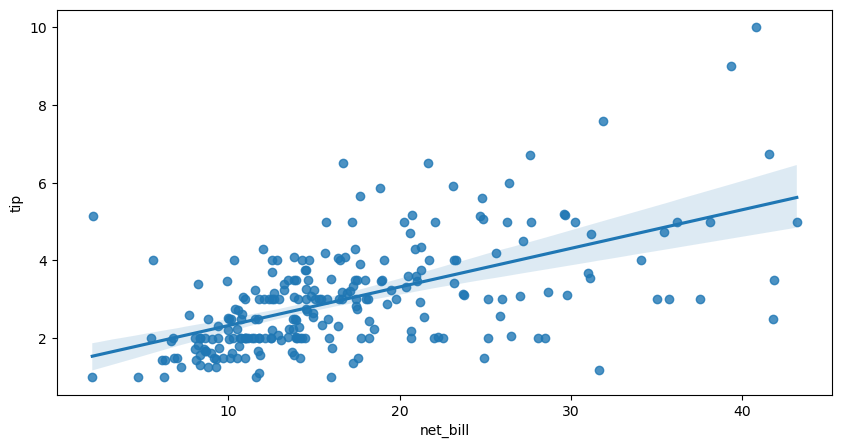

In [26]:
plt.figure(figsize=[10,5])
sns.regplot(y=df['tip'], x=df['net_bill'])
plt.show()

# Como a alteração da inclinação da reta (alpha e beta) pode afetar a função de erro

In [27]:
reg = smf.ols('tip ~ net_bill', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           5.02e-23
Time:                        19:32:34   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Respectivamente, $\alpha$ e $\beta$:

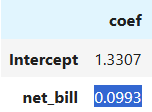

Alterando e testando a função da soma de quadrados do modelo:

In [30]:
# as variáveis de interesse
y = df['tip']
x = df['net_bill']

# Definindo a função para calcular a soma de quadrados do modelo
def calcula_sqm(y, y_hat):
    return (((y - y_hat)**2).sum())

In [31]:
a = 1
b = .09

# Calculando a soma de quadrados
calcula_sqm(y, a + b*x)

369.83795079

**Montando um grid para calcular o erro quadrático médio na base de gorjetas, para diferentes combinações de $\alpha$ e $\beta$**

In [33]:
# De certo modo o grid será definido em torno do alpha e beta que minimizam o erro quadrático médio

alpha_min = .3
alpha_max = 2.3
n_bins = 20
delta1 = (alpha_max - alpha_min)/n_bins

beta_min = .045
beta_max = .15
delta2 = (beta_max - beta_min)/n_bins

# Definindo grid para calcular EQM em função de alpha e beta
grid_alpha = np.arange(alpha_min, alpha_max, delta1)
grid_beta = np.arange(beta_min, beta_max, delta2)

In [34]:
grid_alpha, grid_beta

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
        1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2]),
 array([0.045  , 0.05025, 0.0555 , 0.06075, 0.066  , 0.07125, 0.0765 ,
        0.08175, 0.087  , 0.09225, 0.0975 , 0.10275, 0.108  , 0.11325,
        0.1185 , 0.12375, 0.129  , 0.13425, 0.1395 , 0.14475]))

Calculando a soma dos quadrados do erros do modelo (SQM) para cada valor de $\alpha$ e $\beta$

In [36]:
%%time

# Listas iniciais
i_alpha = []
i_beta = []
i_eqm = []

for alpha in grid_alpha:
    for beta in grid_beta:
        yhat = alpha + beta * x
        i_alpha.append(alpha)
        i_beta.append(beta)
        i_eqm.append(calcula_sqm(y, yhat))

# Gerando um dataframe com os dados
grid = pd.DataFrame(np.empty((len(grid_alpha) * len(grid_beta), 3)), columns = ['alpha', 'beta', 'eqm'])

# Atribuindo os valores
grid.alpha = i_alpha
grid.beta = i_beta
grid.eqm = i_eqm

CPU times: total: 266 ms
Wall time: 114 ms


In [37]:
grid

,alpha,beta,eqm
0,0.3,0.04500,1277.798676
1,0.3,0.05025,1187.620275
2,0.3,0.05550,1102.096845
3,0.3,0.06075,1021.228386
4,0.3,0.06600,945.014898
...,...,...,...
395,2.2,0.12375,719.123955
396,2.2,0.12900,780.489108
397,2.2,0.13425,846.509231
398,2.2,0.13950,917.184326


**Criando um plot 3D**

In [39]:
from mpl_toolkits.mplot3d import Axes3D # eixos 3D
from matplotlib import cm # color map

# !pip install ipympl
# !pip install nodejs-bin

In [40]:
%matplotlib notebook

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_trisurf(grid.alpha, grid.beta, grid.eqm, cmap=cm.jet, linewidth=.2)
plt.show()

<IPython.core.display.Javascript object>

In [41]:
# Aplicando um zoom

grid_select=grid[grid.eqm<360]
fig = plt.figure()
ax = Axes3D(fig)

ax.plot_trisurf(grid_select.alpha, 
                grid_select.beta, 
                grid_select.eqm, cmap=cm.jet, linewidth=0.2)
plt.show()

<IPython.core.display.Javascript object>

##### Questionamentos

1. Marque quais desses métodos/algoritmos muito populares em ciência de dados são baseados no uso de derivada:

    1. Método Mínimos Quadrados
    2. Gradiente descendente
    3. Newton Raphson
    4. CART (Árvore de decisão)


R.  
**A.** - A técnica de derivação é aplicada com o intuito de encontrar os coeficientes que minimizam a soma dos quadrados;

**B.** - Algoritmo que otimiza a busca por mínimos, ou seja, utiliza de derivadas (primeiras) para encontrar os pontos de mínimo de função ou os pontos que minimizam a função;

**C.** - O método tem como objetivo estimar as raízes de uma função. Para tal, é escolhido um valor inicial e então é calculada a equação da reta tangente (aqui se utiliza a derivada) ao gráfico da função no ponto escolhido e a interseção dela com o eixo horizontal (abscissas), com o objetivo de se obter uma melhor aproximação para o valor da raíz;

**D.** - Árvores de decisão não utilizam derivadas e sim métricas calculadas de forma discreta, como o Gini, o ganho de informações e também a redução da variância dos dados (para os casos de regressão).


Um ponto interessante a ser comentado é que as derivadas são utilizadas em algoritmos de otimização. Como comentado, árvores de decisão não utilizam derivadas, mas algorítmos de **gradient boosting** que utilizam sequências de árvores de decisão utilizam derivadas, uma vez que tem como objetivo a obtenção do gradiente da função de perda (derivada) para definir a saída e então o ajuste a ser utilizado para o treinamento de novas árvores (o conceito de derivadas não se aplica às árvores e sim a obtenção dos ajustes).


2. Dada uma base de dados com uma variável resposta $y$ e um conjunto de variáveis explicativas. Considere uma estrutura de um modelo de regressão. Explique com suas palavras por que não é possível obter parâmetros que forneçam um erro quadrático médio (EQM) menor que o obtido com estimadores de mínimos quadrados.

R.

Segundo o teorema de Gauss-Markov o estimador de mínimos quadrados ordinários (OLS) é o melhor estimador linear não enviesado. 

Uma vez que o estimador de mínimos quadrados ordinários é uma otimização matemática que busca encontrar os melhores valores para um conjunto de dados e visa minimizar a soma dos quadrados e assumindo que, por meio de derivadas, pode-se encontrar tais valores, teremos em mãos os melhores parâmetros (matematicamente obtidos) para um determinado conjunto de dados. Logo não seremos capazes de obter parâmetros que forneçam um melhor EQM.

## 4 - Integral

- Compreender o conceito de integral e sua aplicação em ciência de dados
- Aprender a calcular a área sob uma curva usando integrais
- Entender o teorema fundamental do cálculo e sua relação com a derivada.

## 5 - Integral de Riemann

- Compreender o conceito de Integral de Riemann
- Implementar a técnica de Integral de Riemann em um programa de computador
- Analisar as propriedades da integral e a função primitiva.

##### Integral

Na história da matemática, creio que não há muitos conceitos com impactos tão profundos na ciência e na sociedade como a derivada e a integral (que são intimamente relacionadas). Em ciência de dados, para citar um exemplo, podemos elencar o cálculo de probabilidades - que veremos em mais detalhes adiante.

O conceito de integral está associado com a área abaixo de uma função em um determinado segmento de x (domínio). As primeiras ideias estão relacionadas a dividir o eixo x em segmentos, obtendo retângulos cujo cálculo da área é relativamente fácil ($\Delta x$ a dimensão da base e $f(x)$ a dimensão da altura). Conforme bamos aumentando o número de segmentos, vai diminuindo o tamanho do $\Delta x$. Esse conceito é chamado de *integral de Riemann* e está ilustrado belamente na figura abaixo, extraída da wikipedia.




|![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Riemann_Integration_and_Darboux_Upper_Sums.gif/300px-Riemann_Integration_and_Darboux_Upper_Sums.gif) | ![image-2.png](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Riemann_Integration_and_Darboux_Lower_Sums.gif/300px-Riemann_Integration_and_Darboux_Lower_Sums.gif) |
|:-|:-|

[fonte das imagens](https://en.wikipedia.org/wiki/Integral)


Conforme diminuímos o tamanho do segmento, no limite, chegamos na definição de integral abaixo:
$$ \int_{0}^{a} f(x) dx = \lim_{\Delta x\to 0}\sum_{i=0}^{n} f(x_i^*)\Delta x $$

Nesse contexto, definimos $F(x)$ como a *anti-derivada* ou a *primitiva* de $f(x)$ sendo que:

$$ F'(x) = f(x) $$

![imagem](https://upload.wikimedia.org/wikipedia/commons/2/2f/Fundamental_theorem_of_calculus_%28animation%29.gif)

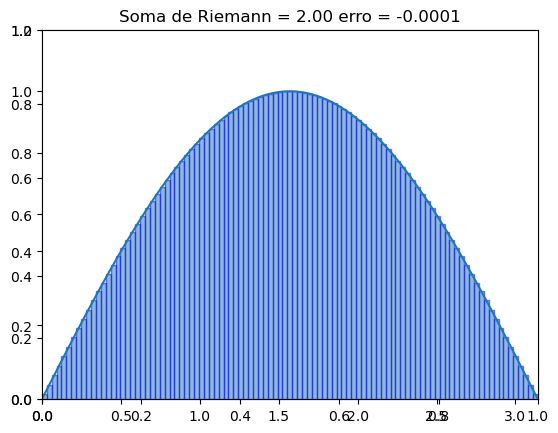

In [87]:
warnings.filterwarnings("ignore")

# seno de x
f = lambda x: np.sin(x)

def calcula_area(a, b, func, frame_num):
    num_bins=frame_num+1 # Quantidade de retângulos
    delta = (b-a)/num_bins # largura do retângulo
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2 # Divisão do eixo X
    y_cols = f(x_cols) # alturas dos retângulos
    return sum(delta*y_cols)
    

def animate(n, a=0, b=np.pi, func=f, verdadeiro_valor = 2):
    
    plt.cla()  # Limpa o gráfico anterior para montar o próxim frame
    ax = plt.axes(xlim=(a, b), ylim = (0, 1.2))  # Monta o sistema de eixos
    
    # Plota a função
    x = np.linspace(a ,b, 100)
    y = f(x)
    ax.plot(x, y, '-');
    
    # Define as quebras e as alturas das colunas
    num_bins=n+1
    delta = (b-a)/num_bins
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2
    y_cols = f(x_cols)

    # plota barras
    bar = ax.bar(x_cols, y_cols, alpha=.5, width = delta, edgecolor='blue')   

    # Área dos retângulos
    soma_riemann = calcula_area(a, b, func, n)
    
    # Erro
    erro = verdadeiro_valor - soma_riemann
    ax.set_title(f'Soma de Riemann = {soma_riemann:.2f} erro = {erro:.4f}')

    return bar
animate(100)
plt.show()

In [47]:
%matplotlib inline

fig = plt.figure(figsize=(10, 6))  # make a new figure
ax = plt.subplot(1,1,1)   

ani = FuncAnimation(fig, animate, frames=40, interval=120, blit=True)
# ani.save('riemann_sum2.gif',writer="imagemagick")
HTML(ani.to_jshtml())

- A função integral de uma função:

A função integral é a "anti-derivada". É a função tal que, se você derivar, dá a mesma função.

De uma forma um pouco mais formal, a integral de $f(x)$ em relação a $x$ é a própria $f(x)$.

$\int f(x) dx = F(x) \Rightarrow F'(x) = f(x)$ 

- Integral definida:

A integral definida é aquela que retorna uma área. Por exemplo, integral de $a$ a $b$ de $f(x)$ fornece a área da função $f(x)$ entre os pontos $a$ e $b$. Isso pode ser escrito assim:

$\int_{a}^{b} f(x) dx = F(b) - F(a)$

Avaliando esta equação obtemos a área sob a curva $f(x)$ entre os pontos a e b.

## Referências

- Construindo gráficos 3d com matplotlib: Esse link tem instruções interessantes sobre como fazer gráficos 3d no python, caso você se interesse, vale dar uma olhada [link](https://www.youtube.com/watch?v=gqoLLGgbeAE)
- Construindo animações com o matplotlib: Fazer animações pode não ser trivial, se você precisar de mais instruções, pode valer a pena olhar este [link](https://www.youtube.com/watch?v=7RgoHTMbp4A)
- 3blue1brown - "a essência do cálculo": Esse canal é muito interessante, ele produz videos com animações muito legais sobre matemática e tem uma playlist altamente recomendável para quem quer entender um pouco mais sobre cálculo, ou simplesmente gosta do assunto [link](https://www.youtube.com/watch?v=WUvTyaaNkzM)
- Artigo sobre derivada da [Wikipedia](https://en.wikipedia.org/wiki/Derivative)
- Artigo sobre integral da [Wikipedia](https://en.wikipedia.org/wiki/Integral)
- Livros sobre cálculo:
    - Há diversos livros sobre o assunto, esse link fala um pouco de alguns deles: [link](https://book360.com.br/melhores-livros-de-calculo-para-universitarios/)
    - Eu usei essa série na minha graduação: "Um Curso de Cálculo - Vol. 1: Volume 1" por  Hamilton Luiz GUIDORIZZI

**Questionamentos**


In [2]:
# Bibliotecas 

import numpy as np 
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

import warnings

**1 - Calcule de forma numérica a integral da função $x^3$ avaliada entre os pontos $1$ e $2$. Identifique o número de retângulos que você usou.**

In [5]:
warnings.filterwarnings("ignore")

# seno de x
f = lambda x: x**3
a = 1
b = 2
n = [0, 25, 50, 75, 5000]

def calcula_area(a, b, func, frame_num):
    num_bins = frame_num + 1 # Quantidade de retângulos
    delta = (b - a)/num_bins # largura do retângulo
    x_cols = np.linspace(a, b - delta, num_bins) + delta/2 # Divisão do eixo X
    y_cols = f(x_cols) # alturas dos retângulos
    return sum(delta * y_cols)

--> O valor da área é: 3.375 u.a.
--> O erro do cálculo é: -0.375
--> O número de retângulos é: 0


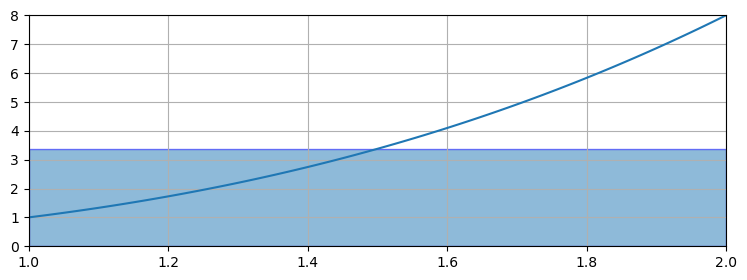

--> O valor da área é: 3.749445266272189 u.a.
--> O erro do cálculo é: -0.0005547337278111186
--> O número de retângulos é: 25


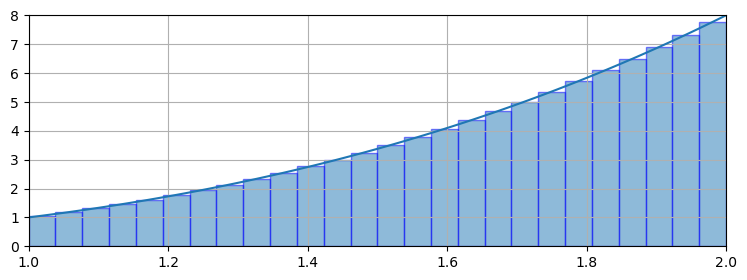

--> O valor da área é: 3.7498558246828138 u.a.
--> O erro do cálculo é: -0.00014417531718624588
--> O número de retângulos é: 50


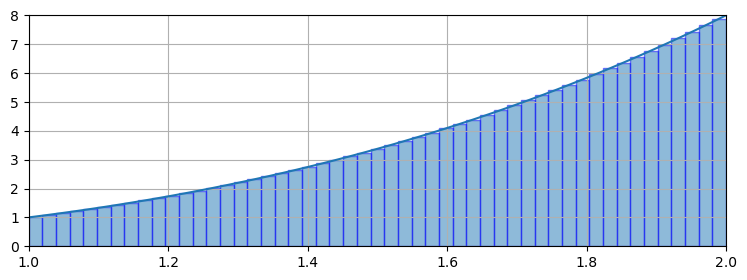

--> O valor da área é: 3.749935076177285 u.a.
--> O erro do cálculo é: -6.492382271483521e-05
--> O número de retângulos é: 75


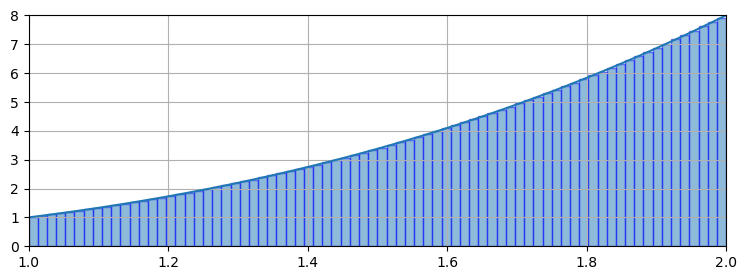

--> O valor da área é: 3.7499999850059895 u.a.
--> O erro do cálculo é: -1.4994010477664688e-08
--> O número de retângulos é: 5000


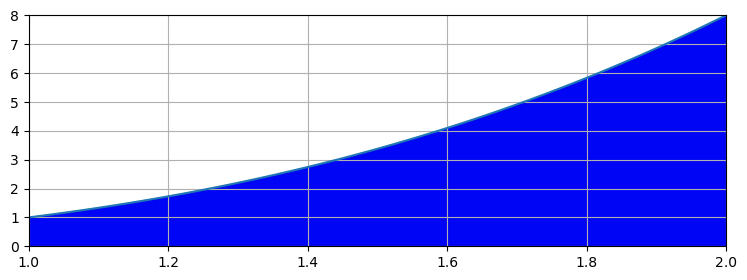

In [7]:
for _ in n:

    # Área
    print('--> O valor da área é: {} u.a.'.format(calcula_area(a, b, f, _)))
    print('--> O erro do cálculo é: {}'.format(calcula_area(a, b, f, _) - 3.75))
    print('--> O número de retângulos é: {}'.format(_))
    
    plt.figure(figsize=[9,3])
    ax = plt.axes(xlim=(a, b), ylim=(0, 8))  # Monta o sistema de eixos
    ax.grid()
    
    # Plota a função
    x = np.linspace(a ,b, 100)
    y = f(x)
    ax.plot(x, y, '-')
    
    # Define as quebras e as alturas das colunas
    num_bins = _ + 1
    delta = (b - a)/num_bins
    x_cols = np.linspace(a, b - delta, num_bins) + delta/2
    y_cols = f(x_cols)
    
    # plota barras
    bar = ax.bar(x_cols, y_cols, alpha=.5, width = delta, edgecolor='blue')
    
    plt.show()

**2 - Calcule essa área de forma analítica**

$$
\int_{1}^{2}x^{3}dx = \frac{1}{4}x^{4}|_{1}^{2} = \frac{1}{4}(2^{4} - 1^{4}) = \frac{1}{4}(16 - 1) = \frac{15}{4} = 3.75 \text{ u.a.}
$$

O valor real da área é $3.75$ u.a. e com esse valor em mãos podemos adicioná-lo na atividade 1 e calcular o erro.